In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_roc_curve


In [ ]:
from google.colab import files
f=files.upload()
data=pd.read_csv("Churn Data.csv")

Saving Churn Data.csv to Churn Data (1).csv


# **EDA**


In [ ]:
#checking the number of rows & columns of the dataset
data.shape
#The dataset consists of 14 columns and 10,000 rows

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#setting to display all 14 columns
pd.set_option('display.max_columns', 14)

In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
#Checking for null values
pd.DataFrame(data.isnull().sum(),columns=["Count"])

,Count
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
#description of continuous variables

#average age of the customers is 39
#credit score is between 350 and 850

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#description for alphanumeric variables
data.describe(include=['object'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
#unique countries in our dataset 
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#gender in our dataset 
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#removing unwanted columns
#dropping row number, customerid, surname as they wont add any value in our churn prediction
data = data.drop(columns=["RowNumber","CustomerId","Surname"])
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


**Addition of extra column based on age group**

In [ ]:
#we are categorzing the generation of customers based on age
data.loc[(data['Age'] <= 25), 'AgeGroup'] = 'Gen Z'
data.loc[(data['Age'] >= 26) & (data['Age'] <= 41), 'AgeGroup'] = 'Millennials'
data.loc[(data['Age'] >= 42) & (data['Age'] <= 57), 'AgeGroup'] = 'Gen X'
data.loc[(data['Age'] >= 58), 'AgeGroup'] = 'Boomers'
data["AgeGroup"].value_counts()
#we can see majority of our customers are millenials 
#genz having the least number of customers, most propbably not famous among students or newly joined working professionals

Millennials    6174
Gen X          2560
Boomers         655
Gen Z           611
Name: AgeGroup, dtype: int64

# **Visualizations**

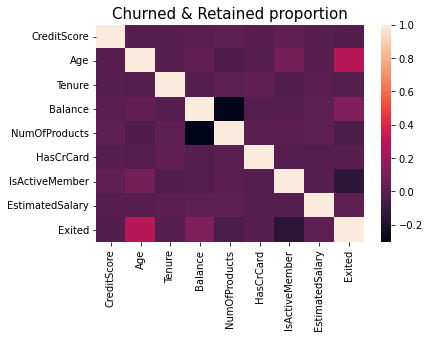

In [ ]:
#correlation of numerical variables
#there isnt much of correlation
#we can see noticable correlation of 0.2 between Age and Exited
corr = data.corr()

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.title("Churned & Retained proportion", size = 15)
plt.show()


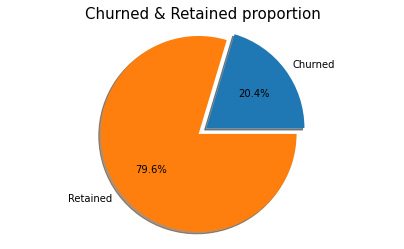

In [ ]:
#pie chart
#it depicts that 79.6 percentage of customers have been retained and 20.4 percentage have churned.
#thus exited attribute is our target feature
fig, axs = plt.subplots(figsize=(7, 4))
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
axs.pie(sizes, explode=(0, 0.1), labels=['Churned', 'Retained'], autopct='%1.1f%%',shadow=True)
axs.axis('equal')
plt.title("Churned & Retained proportion", size = 15)
plt.show()


Text(0.5, 1.0, 'Age Group wise Churned & Retained Proportion')

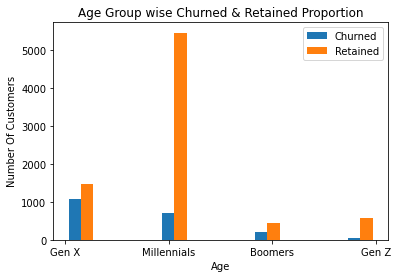

In [ ]:
#Age Group wise Churned & Retained Proportion
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.hist([data[data.Exited == 1].AgeGroup,data[data.Exited == 0].AgeGroup],label=['Churned','Retained'])
plt.legend()
plt.title(label='Age Group wise Churned & Retained Proportion')

Text(0.5, 1.0, 'Age Group wise Gender Proportion')

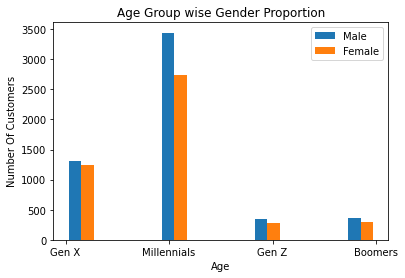

In [ ]:
#Age Group wise Gender Proportion
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.hist([data[data.Gender == 'Male'].AgeGroup,data[data.Gender == 'Female'].AgeGroup],label=['Male','Female'])
plt.legend()
plt.title(label='Age Group wise Gender Proportion')

Text(0.5, 1.0, 'Estimated Salary based on Churn ')

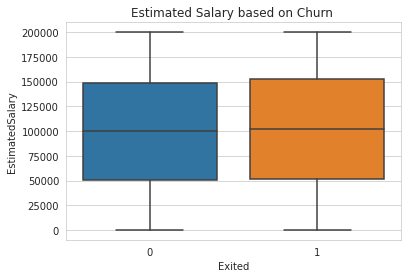

In [ ]:
#Estimated Salary based on Churn and Retaintion
sns.set_style('whitegrid')
sns.boxplot(x='Exited',y='EstimatedSalary', data=data)
plt.title("Estimated Salary based on Churn ")
#utilizing box plot to find outliers

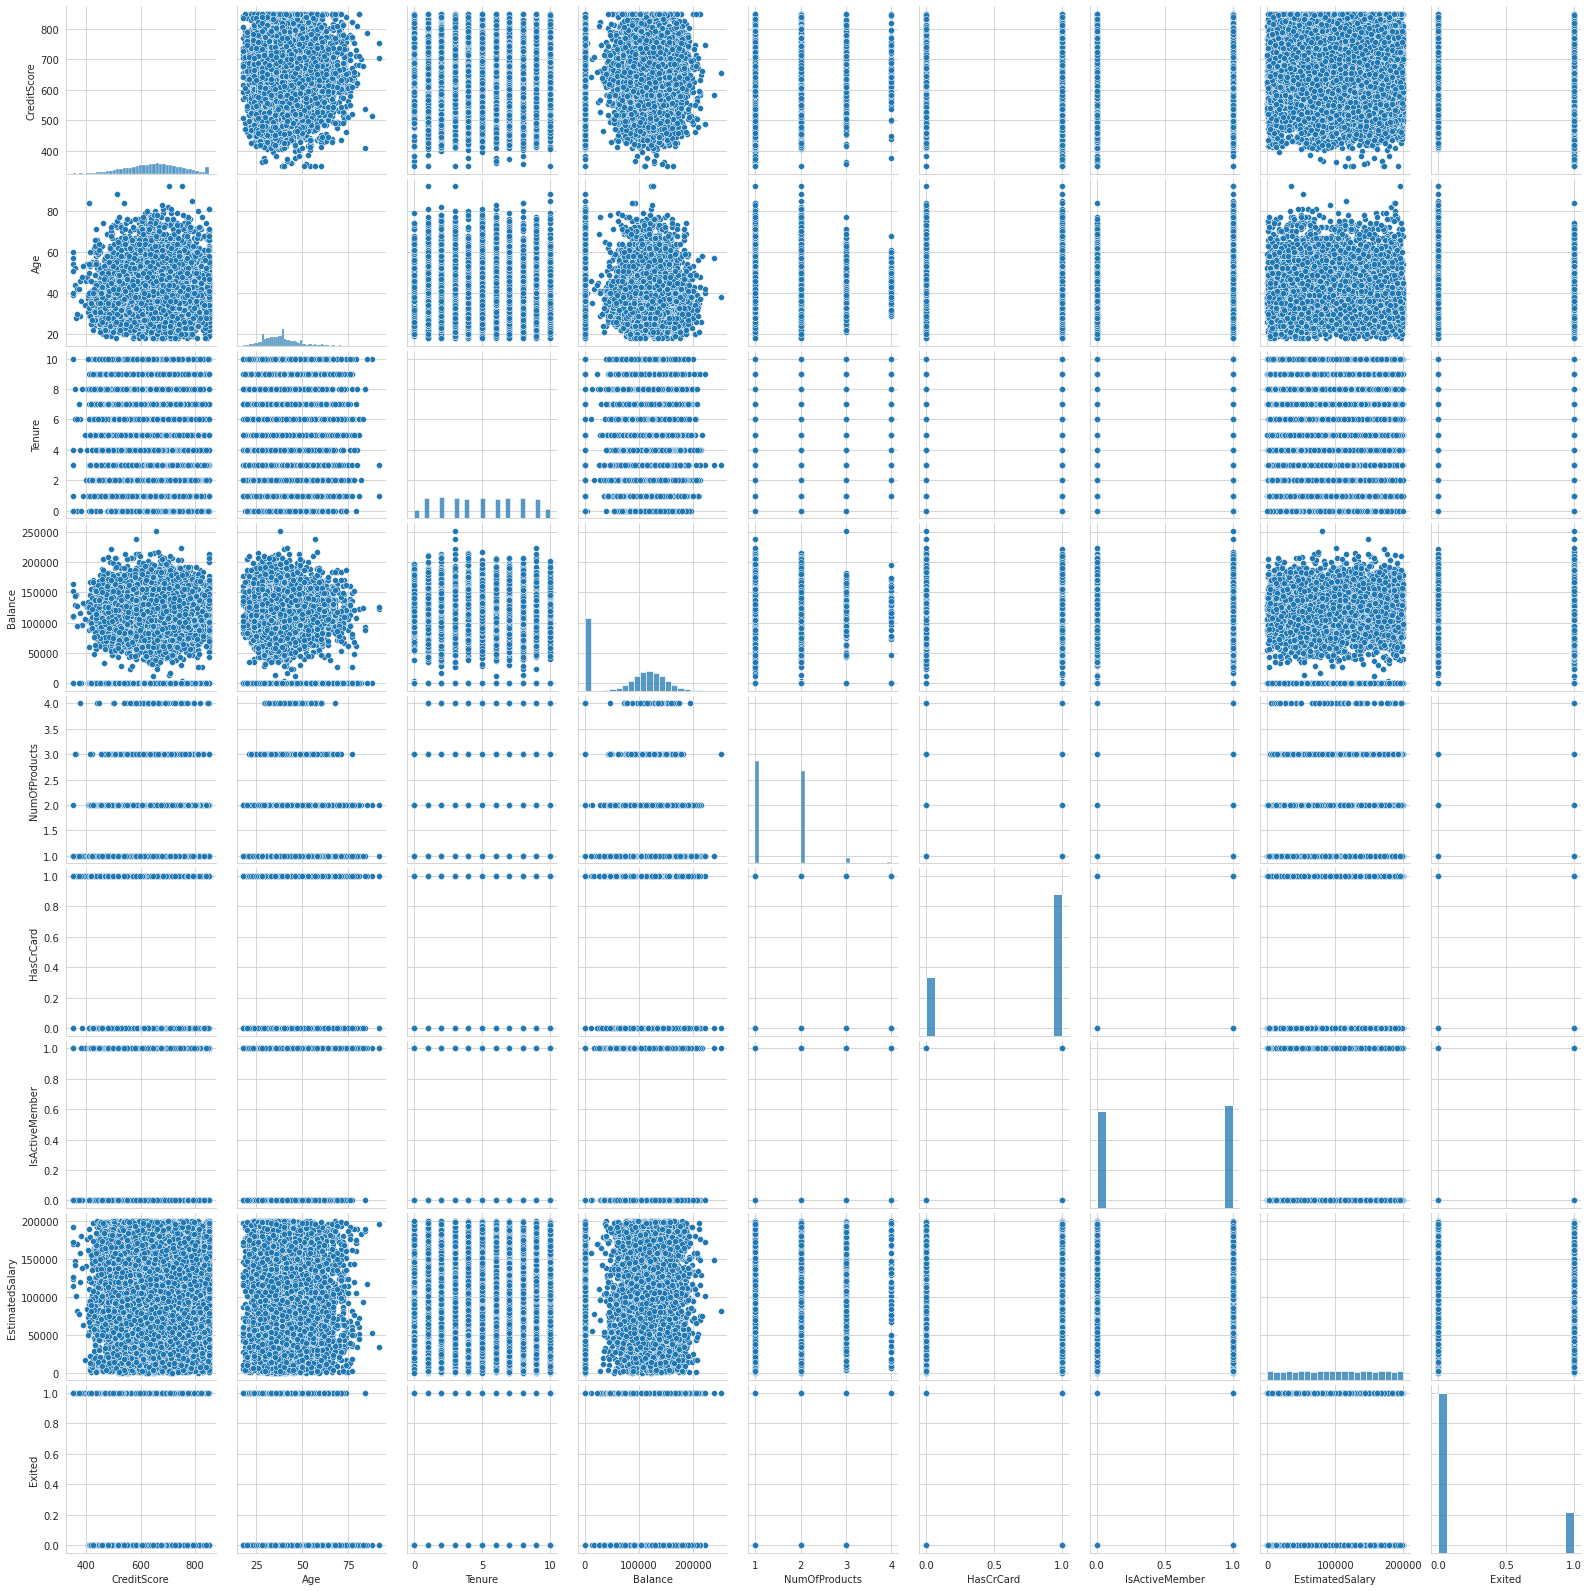

In [ ]:
sns.pairplot(data)

# **Label Encoding**

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [ ]:
#encoding labels of gender for computation
print("Before Encoding: ",data['Gender'].unique())
data['Gender']=label_encoder.fit_transform(data['Gender'])
print("After Encoding: ",data['Gender'].unique())

Before Encoding:  ['Female' 'Male']
After Encoding:  [0 1]


In [ ]:
#encoding labels of Geography for computation
print("Before Encoding: ",data['Geography'].unique())
data['Geography']=label_encoder.fit_transform(data['Geography'])
print("After Encoding: ",data['Geography'].unique())

Before Encoding:  ['France' 'Spain' 'Germany']
After Encoding:  [0 2 1]


In [ ]:
#encoding labels of Age Group for computation
print("Before Encoding: ",data['AgeGroup'].unique())
data['AgeGroup']=label_encoder.fit_transform(data['AgeGroup'])
print("After Encoding: ",data['AgeGroup'].unique())

Before Encoding:  ['Gen X' 'Millennials' 'Gen Z' 'Boomers']
After Encoding:  [1 3 2 0]


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,3
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1


# **PCA Dimensionality Reduction**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled_data=StandardScaler().fit_transform(data.drop('Exited',axis=1))
pca_s=PCA()
pca_s.fit(scaled_data)
#Explained Variance
print("Explained Variance: \n",pca_s.explained_variance_)
#Proportion Variance
print("\nProportion Variance: \n",pca_s.explained_variance_ratio_)
#Cummulative Variance
print("\nCummulative Variance: \n",np.cumsum(pca_s.explained_variance_ratio_))
per_var=np.round(pca_s.explained_variance_ratio_*100,decimals=2)

Explained Variance: 
 [1.79780621 1.30830734 1.04431236 1.02665369 1.0150207  0.99563603
 0.99095967 0.97267623 0.9361278  0.6853768  0.22822328]

Proportion Variance: 
 [0.16342058 0.11892514 0.09492799 0.09332282 0.09226538 0.09050332
 0.09007823 0.08841627 0.08509402 0.06230075 0.0207455 ]

Cummulative Variance: 
 [0.16342058 0.28234572 0.37727372 0.47059654 0.56286192 0.65336523
 0.74344347 0.83185974 0.91695375 0.9792545  1.        ]


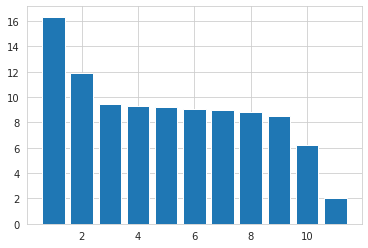

<Figure size 1440x3600 with 0 Axes>

In [ ]:
plt.bar(x=range(1,12),height=pca_s.explained_variance_ratio_*100)
plt.figure(figsize=(20,50))
plt.show()

Dropping last 2 columns as they don't impact the target variables

In [ ]:
scaled_data.shape

(10000, 11)

In [ ]:
#dropping last 2 columns of PCA and storing it in X and y variables
X = scaled_data[:,:-2]
y=data['Exited']

In [ ]:
#Splitting data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
results= pd.DataFrame(columns=['Accuracy','Recall','Precision'])


**KNN** **Classifier**

Text(0, 0.5, 'Error Rate')

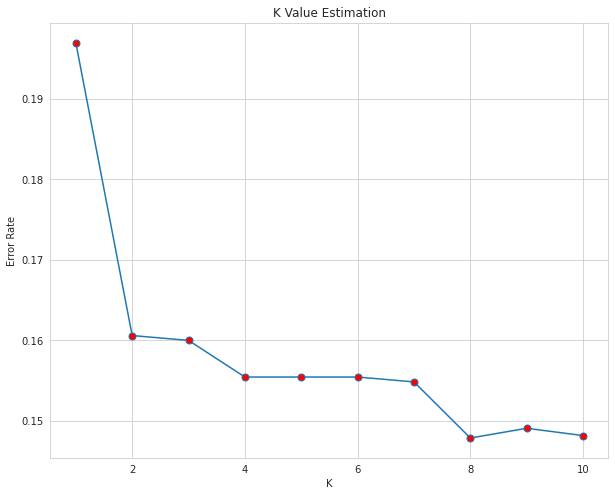

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#finding the error rate for each k ranges from 1 to 10
errors = []
for i in range(1,11):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(X_train,y_train)
  pred = model_knn.predict(X_test)
  err=np.mean(pred!= y_test)
  errors.append(err)

#plotting error rate with respect to K value
plt.figure(figsize=(10,8))
plt.plot(range(1,11),errors,marker='o',markerfacecolor='red', markersize=7)
plt.title('K Value Estimation')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#considering k= 5 for KNN
from sklearn.metrics import confusion_matrix,recall_score,precision_score, plot_roc_curve

model_knn = KNeighborsClassifier(n_neighbors=i) 
model_knn.fit(X_train,y_train)
pred = model_knn.predict(X_test)
print("Confustion Matrix:\n",confusion_matrix(y_test,pred))
print("Model Score(Accuracy):",round(model_knn.score(X_test,y_test)*100,2),"%")
print("Recall:",recall_score(y_test,pred,average='macro'))
print("Precision:",precision_score(y_test,pred,average='macro'))
results.loc['K Nearest Neighbour']=[round(model_knn.score(X_test,y_test)*100,2),recall_score(y_test,pred,average='macro'),precision_score(y_test,pred,average='macro')]


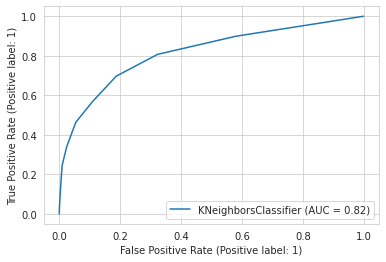

In [ ]:
#ROC Curve for KNN
plot_roc_curve(model_knn,X_test,y_test)
plt.show()

**Logistic Regression**

In [ ]:
#Using Logistic Regression Model to predict the score
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred=model_lr.predict(X_test)
print("Confustion Matrix:\n",confusion_matrix(y_test,pred))
print("Model Score(Accuracy):",round(model_lr.score(X_test,y_test)*100,2),"%")
print("Recall:",recall_score(y_test,pred,average='macro'))
print("Precision:",precision_score(y_test,pred,average='macro'))
results.loc['Logistic Regression']=[round(model_lr.score(X_test,y_test)*100,2),recall_score(y_test,pred,average='macro'),precision_score(y_test,pred,average='macro')]


Confustion Matrix:
 [[2581   76]
 [ 529  114]]
Model Score(Accuracy): 81.67 %
Recall: 0.5743451231554197
Precision: 0.714951768488746


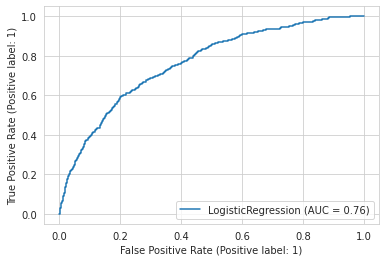

In [ ]:
#ROC Curve for Logistic Regression Model
plot_roc_curve(model_lr,X_test,y_test)
plt.show()

**Random Forest Classifier**

Text(0, 0.5, 'Accuracy')

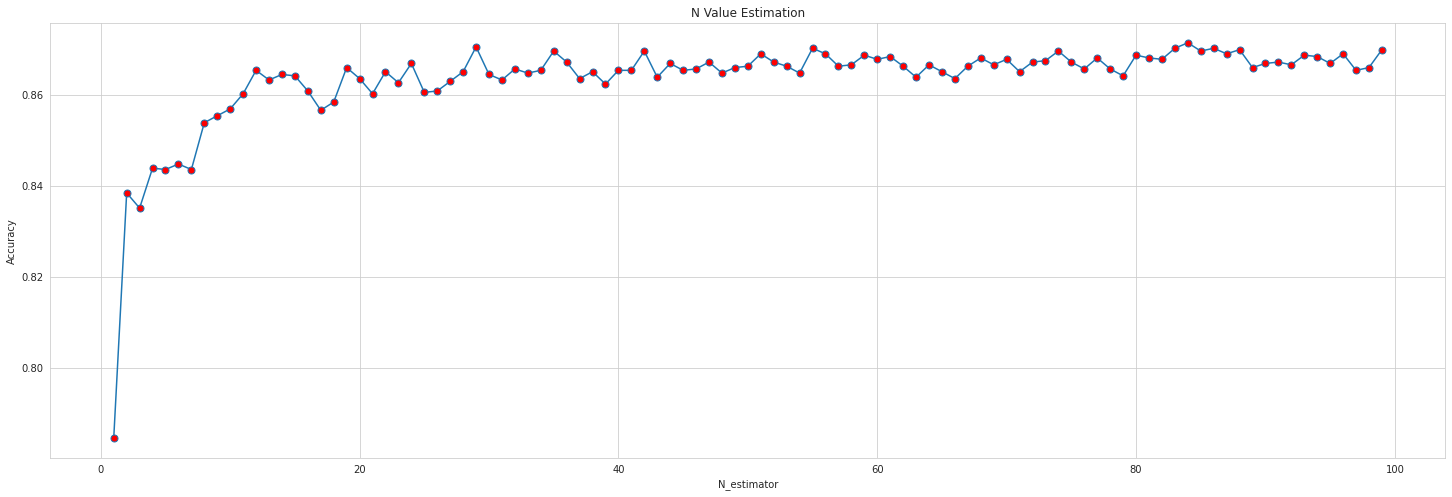

In [ ]:
#Finding the number of estimators using Error Rate
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(1,100):
  model_rf = RandomForestClassifier(n_estimators = i) 
  model_rf.fit(X_train, y_train)
  pred = model_rf.predict(X_test)
  acc.append(model_rf.score(X_test,y_test))

plt.figure(figsize=(25,8))
plt.plot(range(1,100),acc,marker='o',markerfacecolor='red', markersize=7)
plt.title('N Value Estimation')
plt.xlabel('N_estimator')
plt.ylabel('Accuracy')

In [ ]:
#Model Output based on n_estimators=100
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100) 
model_rf.fit(X_train, y_train)
pred = model_rf.predict(X_test)
acc.append(model_rf.score(X_test,y_test))
print("Confustion Matrix:\n",confusion_matrix(y_test,pred))
print("Model Score(Accuracy):",round(model_rf.score(X_test,y_test)*100,2),"%")
print("Recall:",recall_score(y_test,pred,average='macro'))
print("Precision:",precision_score(y_test,pred,average='macro'))
results.loc['Random Forest Classifier']=[round(model_rf.score(X_test,y_test)*100,2),recall_score(y_test,pred,average='macro'),precision_score(y_test,pred,average='macro')]


Confustion Matrix:
 [[2563   94]
 [ 342  301]]
Model Score(Accuracy): 86.79 %
Recall: 0.7163699749070942
Precision: 0.8221486306891217


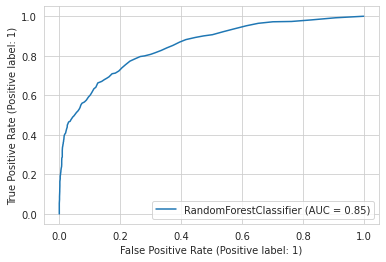

In [ ]:
#ROC Curve for Random Forest Classifier
plot_roc_curve(model_rf,X_test,y_test)
plt.show()

In [ ]:
#Overall Results
results

,Accuracy,Recall,Precision
K Nearest Neighbour,85.18,0.658064,0.815272
Logistic Regression,81.67,0.574345,0.714952
Random Forest Classifier,86.79,0.716370,0.822149
